(02-uncertainty)=
# Conceptual Tools for Handling Uncertainty


In [1]:
# Cell removed
import grama as gr
import plotnine as pt
import numpy as np
DF = gr.Intention()


This book is focused on *applications*, so here we present a framing of uncertainty that is carefully chosen to *help you make decisions* [^theoretical]. The concepts here aim to describe uncertainty as *non-overlapping types*, and to make suggestions about *how to handle* each type of uncertainty. In this way, we aim to provide you with tools to handle uncertainty.

**Learning Objectives** In this chapter, you will learn

- the distinction between *parametric* and *model-form nature*
- the distinction between *chance* and *assignable causes*
- the distinction between *real* and *induced sources*
- some special cases of uncertainty: *variability* and *sampling*
- examples of these concepts in short case studies


## Uncertainty

---

Let's start with a definition for uncertainty:

Uncertainty
: *Uncertainty* refers to any lack of perfect knowledge.

Given this definition, almost *everything* is uncertain! Our knowledge is always imperfect in a variety of ways: rounding in floating point calculations leads to a loss of precision, experimental noise corrupts our measurements, and a lack of a theory marrying quantum mechanics and relativity reflects our imperfect knowledge of physics. 

To make our understanding of uncertainty more *useful*, we will introduce three dichotomies to describe various *kinds* of uncertainty: *nature*, *cause*, and *source* of uncertainty.


### Dichotomy: Parametric vs Model-form Nature

It is common to distinguish between uncertainties in a quantity and in the form of equations {cite}`smith2013uncertainty,morgan2017theory,cullen1999probabilistic`. We will call these the *parametric* and *model-form natures* of uncertainty.

Parametric uncertainty
: Uncertainty that is *parametric* in nature concerns the *value* (numeric, categorical, or etc.) of a quantity.

Parametric uncertainty can arise in many situations, such as the coefficients entering into a physical model, the stiffness of a manufactured part, or the range of a ballistic projectile. As noted in the definition, the quantity of interest can take numerical values (such as a material property), categorical values (such as True or False), or some other more complicated type (such as a description of surface finish of a material).


Model-form uncertainty
: Uncertainty that is *model-form* in nature concerns the *form* of a model. 

Note that we use the word "model" to refer to both the description of the inputs (bounds and distribution) and the functions mapping inputs to outputs. Thus model-form uncertainty can enter into the mathematical description of the problem that maps inputs to outputs and can enter into the distributions we use to describe input uncertainty. 

Model-form uncertainty can also emerge when assumptions or simplifications lead to the exclusion of important processes or subsystems. One way this can occur is when important variables are left out of your model, sometimes called *lurking variables* {cite}`delRosario2019lurking,joiner1981,box1966`.

```{admonition} Example: Natures of uncertainty in trajectory prediction
Uncertainties of both natures arise in predicting the [trajectory of a projectile](app-trajectory). A simple linear relationship for the drag force has model-form uncertainty, as true drag behavior is far more complex. The initial velocity of the projectile may not be precisely known, which would be a parametric uncertainty.
```

The related term *model-form error* refers to cases when a model *systematically* produces erroneous predictions; in this case we say the model does not "match" reality. A single poor prediction might be due to parametric uncertainty (a "miscalibration" of the model), but if a model is repeatedly incapable of representing observed phenomena, then there exists some model-form error. We will see a detailed example of model-form uncertainty and error in the Section on [model-form error](02-model-form-error).

```{admonition} Parametric or Model-form in Nature?
Determining whether an uncertainty is parametric or model-form in nature helps you determine "where" the uncertainty is in your model---and what actions you should take. If you have model-form uncertainties, you may need to update the form of your equations, add new variables, or represent unexplained phenomena with a discrepancy term. If you have parametric uncertainties, you can gather data on those quantities and model them with distributions.
```

### Dichotomy: Chance and Assignable Causes

The concept of chance and assignable causes was formulated in the statistical quality (manufacturing) community, and is tailored for making practical decisions about reducing uncertainty {cite}`shewhart1931economic,shewhart1986statistical,deming1982quality`. The philosophy is to seek as many assignable causes as it is practical to find, and to treat the remaining uncertainties as though they had chance cause.

Assignable Cause
: An uncertainty has *assignable cause* if it is practical to describe and to control / represent deterministically.

Seeking assignable causes is a strategy to *reduce* uncertainty. For instance, catching an implementation error in your model reduces uncertainty (improves your state of knowledge). Assignable causes can be either parametric or model-form in nature: Detecting a lurking variable would be a model-form assignable cause, while catching a transcription error during data collection would be a parametric assignable cause.

As noted above, the notion of *cause* was formulated in the pragmatic setting of manufacturing. When it is no longer practical to find assignable causes, we treat the remaining uncertainty as *chance cause*.

Chance Cause
: An uncertainty has *chance cause* if it is impractical to describe deterministically and it is best-described as a random variable.

Once we have identified all the assignable causes in a system that are practical to find, we are likely to have some uncertainty remaining. Rather than simply ignore that uncertainty, we can model it as a random variable (fit a distribution) to provide a *quantitative* description of that uncertainty. 

```{admonition} Example: Crack detection as chance cause
In metallic components, small cracks can grow during cyclic loading, eventually leading to fatigue failure. However, it is not practical to eliminate all cracks in all parts. Thus, modern aircraft are *assumed* to have cracks of a particular size, based on the statistics of inspection programs {cite}`anderson2017fracture`. The assumed size of a crack is based on practical detection rates, derived by treating detection as a random event. While exhaustive searching might *in principle* be able to detect all cracks, the presence of a crack is treated as a chance cause due to the practical nature of aircraft manufacturing and inspection.
```

Determining whether an uncertainty is a chance or assignable cause is a *modeling choice*, though there exist investigative tools to help you detect assignable causes. For more on chance and assignable cause, see the appendix entry on [statistical control](app-stat-control).

```{admonition} Chance is not inherently random
We do *not* need to seriously believe that a source of uncertainty is *inherently* random to treat it as a chance cause. The philosophy of chance and assignable causes is a *pragmatic* one. A "truly" random event (such as a quantum measurement) would be justifiably described as having chance cause, but even deterministic phenomena can be treated as chance so long as they exhibit sufficient statistical regularity (i.e. satisfy the criteria of [statistical control](app-stat-control)).
```

As a worked example of chance and assignable causes, let's inspect the elasticity $E$ and Poisson ratio $\mu$ measurements from the [aluminum alloy dataset](app-al). 

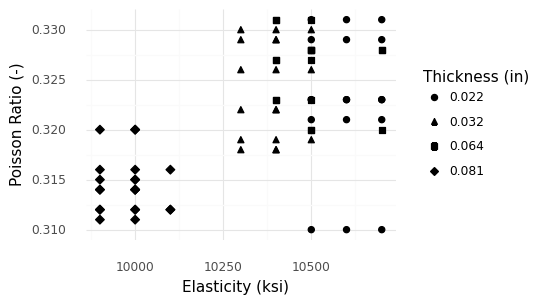

<ggplot: (8790284953805)>

In [2]:
%%capture --no-display
# Hide cell
from grama.data import df_stang

(
    df_stang
    >> gr.tf_mutate(thick=gr.as_factor(DF.thick))
    >> pt.ggplot(pt.aes("E", "mu", shape="thick"))
    + pt.geom_point(size=2)
    + pt.scale_shape_discrete(name="Thickness (in)")
    + pt.theme_minimal()
    + pt.theme(figure_size=(4, 3))
    + pt.labs(
        x="Elasticity (ksi)",
        y="Poisson Ratio (-)",
    )
)

Since elasticity and the Poisson ratio are often assumed to be material properties---independent of part thickness---it is surprising to see the thickest samples with property values well-separated from the thinner specimens. These data exhibit both chance and assignable causes:

- The $0.081$ inch thick specimens stand well-separated from the other observations. By reviewing the original publication reporting these data, we can see that the thickest specimens were tested using a different measurement technique, providing an assignable cause for the variability between the $0.081$ inch and thinner observations {cite}`stang1946`.
- The remaining thinner specimens are tightly-grouped, but do not have identical values. We have no other explanations available for this variability, so we ought to treat this as chance cause.


```{admonition} Treating chance and assignable causes
If you suspect that an uncertainty has an assignable cause, conduct additional studies to find and control / explain that cause of uncertainty. If you suspect that an uncertainty cannot be practically reduced *and* it is sufficiently regular to treat as random, then fit a distribution to describe that uncertainty.
```

### Dichotomy: Real and Induced Sources

A distinction between *real* and *induced sources* of uncertainty is made in the statistics education community {cite}`wild1999statistical`. To understand this distinction, we must first introduce some nomenclature.

Scopus and Measurement
: Our *scopus* is the quantity we seek to record, while the *measurement* is the value we manage to record.

The following figure illustrates the scopus [^scopus] and measurement in a simple scenario with two chance cause uncertainties.


![Noise vs Deviation](../images/noise-v-deviation-bw.png)


Note that we are responsible for *choosing* our scopus. This requires a strong domain-specific understanding of the problem at hand: Only you can decide what quantity is worth studying in your particular application!

```{admonition} Not all scopi are equal!
:class: warning
In Chapter TODO, we will see how a poor choice of scopus has lead to decades-standing errors in aircraft design that negatively impact safety. 
```

Drawing a distinction between the scopus and measurement helps to emphasize that uncertainty can either *affect* or *corrupt* the quantity we seek to study, as captured in the next definition.

Real and Induced Sources
: An uncertainty is said to be a *real source* if it affects our scopus, while it is said to be an *induced source* if it only affects our measurement.

Put differently, *real* uncertainty affects the quantity we seek to study, while *induced* uncertainty corrupts the value we seek to study. Induced uncertainty can also be due to *limited* data collection; realized scopus values might exist, but if we can only observe a fraction of the possible values then there exists induced uncertainty.

```{admonition} Example: Real and Induced variability in manufacturing
When manufacturing structural components to resist fatigue, there are both real and induced sources of uncertainty. The proper scopus when studying the fatigue of structural components is the *realized* strength of each component. As noted above, the presence of cracks in a part will affect fatigue strength, which will affect our scopus and create real uncertainty. However, while we can manufacture an unlimited number of components, we can only test a limited fraction. Limited testing gives rise to induced uncertainty.
```


Distinguishing between real and induced sources is important for both data collection and analysis.

```{admonition} Treating real and induced sources in data collection
If you believe that your scenario is affected by real uncertainty, then you should prepare and characterize multiple specimens according to the same specifications. If you believe that your your measurements are affected by induced uncertainty, then you should take multiple measurements on each specimen. If you have a mix of real and induced sources, then you should prepare multiple specimens and measure each one multiple times [^nested].
```

```{admonition} Treating real and induced sources in data analysis
**TODO** Make this example much more concrete!

It is common to treat induced uncertainties as additive and *unbiased* (zero-mean); under these assumptions, taking the sample mean of measurements will result in a more accurate measurement of the scopus. However, if there is real uncertainty, then it is not valid to simply average the measurements. Instead, it is better to use multiple summary statistics (such as location and spread parameters) to describe the data, or to formally model that uncertainty as a random variable.

Additionally, you should eliminate or otherwise handle assignable causes before following the steps above. An assignable cause will tend to violate the unbiasedness assumption common to treating induced uncertainty.
```

### Making use of Nature, Cause, and Source

The nature, cause, and source dichotomies are independent axes intended to help you make informed decisions in the modeling process.

*Cause* determines what high-level strategy you will pursue for a particular uncertainty: seek additional information (assignable cause) or model as a random variable (chance cause).

*Nature* determines where in your model a particular uncertainty occurs: in the parametric factors or the form of the model.

*Source* determines how to analyze a particular uncertainty: summarize multiple observations to produce a better measurement (induced source) or propagate / quantify extreme values of the uncertainty (real source).


### Cause-Source Quadrants

The cause and source dichotomies serve as independent axes. Using these as orthogonal axes yields the *cause-source quadrants*, visualized below. Each quadrant can be given a descriptive name: *noise, deviation, anomaly,* and *mistake*.

![variability quadrants](../images/cause-source-quadrants-bw.png)

*Distinctions*

To learn how to recognize each of the quadrants, it is helpful to see pairwise distinctions across each axis:

```{admonition} Noise v Deviation
Both noise and deviation are treated as random, but deviations affect the quantity we seek to study, while noise corrupts our measurements.
```

```{admonition} Noise v Mistake
Both noise and mistakes corrupt a measurement, but noise is treated as random, while a mistake has an assignable cause.
```

```{admonition} Deviation v Anomaly
Both deviations and anomalies are real, but deviations are treated as random, while an anomaly has an assignable cause.
```

```{admonition} Anomaly v Mistake
Both anomalies and mistakes have assignable causes, but anomalies affect the quantity we seek to study, while mistakes corrupt our measurements.
```


## Special Cases of Uncertainty

The following are special cases of uncertainty. Each can still be analyzed in terms of the nature, cause, and source dichotomies, but are still useful cases to recognize.


### Variability

Variability
: *Variability* is a form of uncertainty that occurs when repeated measurements from a single chosen scenario exhibit different outcomes.

There are several components to this definition, elucidated below.


*Different outcomes*

Trivially, we must have *different* outcomes for there to be variability. If repeated measurement of the same quantity produces the same value, then there is no variability.


*Repeated measurements*

Variability requires repeated measurements, implying that there must be *more than one* measurement. Uncertainty about a value that we *fundamentally* cannot measure is not variability. Additionally, unique events that will never occur again cannot be said to exhibit variability.


*A single chosen scenario*

Variability arises when we focus on a *single* scenario and take repeated measurements. Studying different scenarios means we should not expect measurements to come out the same. We might describe a scenario in terms of detailed qualitative factors (e.g. a single manufacturer) or we may index a family of scenarios with continuous variables (e.g. a continuum of feed speeds when machining).

For instance, if we expect that an outcome $y$ tends to vary with an input $x$ as $y = x^2$, then we would not consider changes as we vary $x$ to be variability, but rather a deterministic trend. However, we can observe a mixture of variability and trends, as the following figure demonstrates.


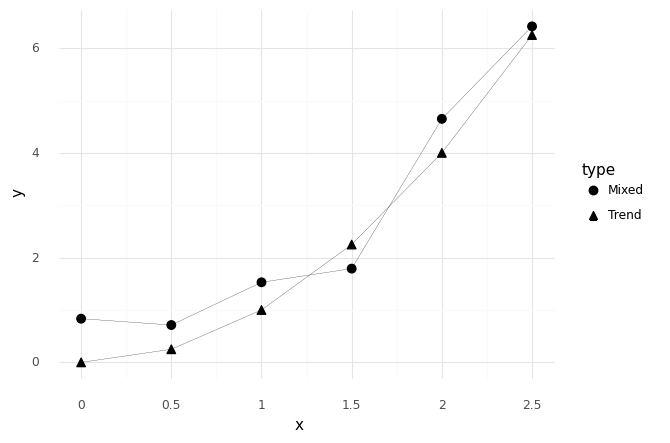

<ggplot: (8790293807025)>

In [3]:
%%capture --no-display
# Hidden cell input
np.random.seed(102)
n = 6
(
    gr.df_make(x=range(0, n))
    >> gr.tf_mutate(x = DF.x / 2)
    >> gr.tf_mutate(
        y_Trend=DF.x**2,
        y_Mixed=DF.x**2 + np.random.normal(size=n, scale=0.5),
    )
    >> gr.tf_pivot_longer(
        columns=["y_Trend", "y_Mixed"],
        names_to=(".value", "type"),
        names_sep="_",
    )
    >> pt.ggplot(pt.aes("x", "y", group="type"))
    + pt.geom_line(size=0.1)
    + pt.geom_point(pt.aes(shape="type"), size=3)
    + pt.theme_minimal()
)

Finally, the scenario must be *chosen*. It could be the case that a *lurking variable*---some unknown input---is fluctuating and causing the observed variability. In principle, such an unknown variable might be controllable and predictive of the observed variability (like $y = x^2$), but until we are aware of such an unknown factor, the differing measurements are variability. 


```{admonition} Example: Manufacturing line
Components of the same material and processing method on a manufacturing line would be expected to have *similar* but not *identical* performance. This manufacturing line would constitute a chosen scenario. Different parts, different materials, or different processing methods would constitute different scenarios, and thus we would not describe measurement differences attributed to these different scenarios as variability.
```

The presence of variability in a chosen scenario has an important ramification for the design of data collection:

```{admonition} Variability necessitates multiple observations!
:class: warning
If there is variability in your chosen scenario, this implies that you should collect *repeated observations from the same scenario* to inform your modeling.
```


### Sampling Uncertainty

Sampling Uncertainty
: *Sampling uncertainty* is parametric, chance, induced uncertainty arising from limited data.

Since all datasets are finite, sampling uncertainty is present any time we are working with data. The tools of statistical inference are designed to rigorously analyze and quantify sampling uncertainty.


## Case Studies

---


### Vaccine Efficacy

Testing the efficacy of a virus-targeting vaccine, measured as the percentage of treated individuals who are not infected by the virus.

Scopus: Full adult US population efficacy, as-manufactured

| Uncertainty     | Nature | Cause      | Source  |
|-----------------|--------|------------|---------|
| Entry error     | Param. | Assignable | Induced |
| Finite sample   | Param. | Chance     | Induced |
| Biased sample   | Param. | Assignable | Induced |
| Comorbidities   | Model-form | Chance     | Real    |
| Mfg. error      | Param. | Assignable | Real    |

*Entry error*: Vaccine status is recorded via paper records. A data-entry error could mistakenly record the wrong assignment (treatment rather than placebo), which would affect our conclusions, but not the vaccine efficacy. Parametric, assignable, induced. Variability

*Finite sample*: The full adult US population includes millions of people, but it is not feasible to test a vaccine on this full population. Practically, a subset of the full population must be chosen for testing; this constitutes our *sample*. Carefully designing this sample helps to mitigate various forms of uncertainty. Parametric, chance, induced. Sampling (TODO need to note randomness is what makes this chance!)

*Biased sample*: Our scopus considers the full adult US population; if our sample over-represents high-income persons, this would be a biased sample. Since income is well-correlated with health outcomes, this would affect our *measurement* of the efficacy, but would not change the efficacy for the desired population. Parametric, assignable, induced.

*Comorbidities*: No two adults have an identical health status. Individuals tend to have *comorbidities*, the simultaneous presence of multiple diseases. Since the presence of any disease varies over time, and a comorbidity can affect the infectiousness of a disease, comorbidities will affect the efficacy in the target population. Model-form, chance, real. Variability

*Manufacturing error*: If doses of the vaccine are incorrectly manufactured---say, have half the desired dosage---then the vaccine will likely be less effective than intended. Since our scopus considers the vaccine *as-manufactured* and not *as-designed*, this manufacturing error will affect our scopus. Parametric, assignable, real. Variability


### Wind Farm

Predicting the daily power generation for a particular wind farm using an imperfect physics-based model.

Scopus: Physical total power generation of the wind farm on a given day

| Uncertainty     | Nature | Cause      | Source  |
|-----------------|--------|------------|---------|
| Aero. model     | Model-form | Assignable | Induced |
| Wind conditions | Param. | Chance     | Real    |
| Discrepancy     | Model-form | Chance     | Induced |

*Aerodynamic model*: Simulating an entire wind farm is likely to be too computationally intensive to model with the highest-fidelity aerodynamic models available. This means that reasonable approximations to the physics must be made in the name of computational tractability. Since our scopus considers the *physical* power generated, this choice of model cannot affect our scopus. Model-form, assignable, induced.

*Wind conditions*: To simulate performance on any day, we must have the ambient flow conditions as inputs for the physics-based model. Weather is as-of-yet not perfectly predictable, especially far in advance. The real weather conditions will set the physical power generated. Parametric, chance, real. Variability

*Discrepancy*: Since our model is imperfect, even if we were to do a retrospective calculation using the as-measured wind conditions and true power generated, the predicted and actual values would not match. Since it is not practical to improve the aerodynamic model further (see above), we might choose to treat this remaining discrepancy as a random process. Model-form, chance, induced.


### Piston Cycle Time

Testing an internal combustion engine (ICE) for cycle time in an environment-controlled lab targeting standard temperature and pressure (STP).

Scopus: Given ICE cycle time in a controlled lab at STP

| Uncertainty     | Nature | Cause      | Source  |
|-----------------|--------|------------|---------|
| Ambient cond.   | Param. | Assignable | Induced |
| Fuel-air mix    | Param. | Assignable | Real    |
| Switch bounce   | Param. | Chance     | Induced |

*Ambient conditions*: If ambient conditions depart from STP, then the measured cycle time will biased away from the value we are attempting to measure. Parametric, assignable, induced.

*Fuel-air mix*: The fuel-air mixture will certainly affect the cycle time, but was left unspecified in the description above. If left unconsidered, the fuel-air mix will not be tightly controlled, and may cause additional variability. This oversight would quickly be found, a desired fuel-air mixture decided upon, and the source of variability eliminated. Parametric, assignable, real. 

*Switch bounce*: Mechanical switches are spring-operated and will tend to "bounce" when depressed. This creates a fluctuating waveform that must be processed to identify the "true" time at which the switch was thrown. This processing is usually done with simple assumptions rather than detailed modeling of the switch. Parametric, chance, induced.


<!-- footnote-definitions -->

[^theoretical]: There are more theoretical treatments of uncertainty, such as the ideas of *aleatory* and *epistemic* uncertainty {cite}`der2009aleatory`. However, uncertainties can be *both* aleatory and epistemic, and there is open-conflict in the literature about when each category applies {cite}`der2009aleatory,morgan2017theory`.

[^scopus]: The word "scopus" is latin for "target." However, the English word "target" is often used for engineering concepts such as a *design target*, the aim a designer has in producing a design. To distinguish a value to be studied from other possible targets, we use the term scopus.

[^nested]: In statistics, this is called a "nested design of experiment" {cite}`ryan2007doe`.